# Python com Banco de Dados SQLite

O SQLite é provavelmente o banco de dados mais simples para se conectar a um aplicativo Python, pois você não precisa instalar nenhum módulo externo do Python SQL para fazer isso. Por padrão, sua instalação do Python contém uma biblioteca SQL do Python chamada sqlite3 que você pode usar para interagir com um banco de dados SQLite.

Além disso, os bancos de dados SQLite são sem servidor e independentes, pois leem e gravam dados em um arquivo. Isso significa que, ao contrário do MySQL e do PostgreSQL, você nem precisa instalar e executar um servidor SQLite para executar operações de banco de dados.

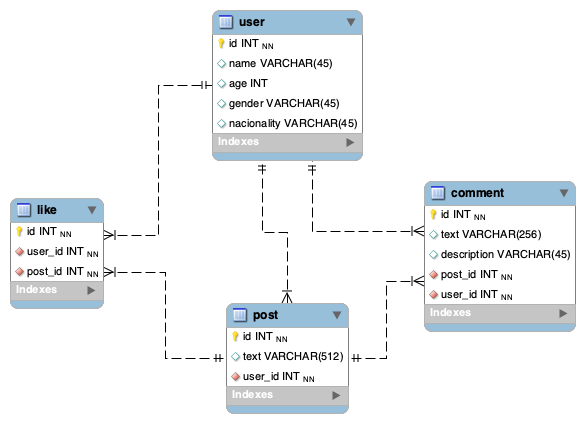

Iremos implementar um banco de dados para um aplicativo de mídia social. Ele consistirá em quatro tabelas:
- **user**, que representa os usuários;
- **post**, que representa as postagens de cada usuário; cada um pode fazer **n** posts;
- **comment**, quer representa os comentários dos usuários em cada postagem; um usuário pode fazer **n** comentários e um post pode ter **n** comentários;
- **like**, quer representa as curtidas dos usuários nas postagens; um post pode ter **n** likes e um usuário pode dar **n** likes.

Cada tabela tem uma chave primária própria auto incrementada. Um diagrama relacional deste banco é mostrado acima.

## Fazendo uma conexão com o banco

In [1]:
import sqlite3
from sqlite3 import Error
 
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

O path é o arquivo onde o banco será criado.

In [2]:
connection = create_connection(".\\sm_app.sqlite")

Connection to SQLite DB successful


## Função para execução de comandos DDL e comandos DML insert, update e delete

Quando o comando é um insert a função imprime o último id que foi criado pelo autoincrement

In [3]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
        
        # imprimir o id criado pelo autoincrement somente nos inserts, 
        # pois nos demais comandos dá resultados incoerentes
        if query.lstrip().upper().startswith('INSERT'):
            print('Last insert id:', cursor.lastrowid)
    except Error as e:
        print(f"The error '{e}' occurred")

In [4]:
# executa queries parametrizadas
def execute_par_query(connection, query, pars):
    cursor = connection.cursor()
    try:
        cursor.execute(query, pars)
        connection.commit()
        print("Query executed successfully")
        
        # imprimir o id criado pelo autoincrement somente nos inserts, 
        # pois nos demais comandos dá resultados incoerentes
        if query.lstrip().upper().startswith('INSERT'):
            print('Last insert id:', cursor.lastrowid)
    except Error as e:
        print(f"The error '{e}' occurred")

## Dropando tabelas

In [5]:
drop_user_table = """
DROP TABLE IF EXISTS user;
"""
drop_post_table = """
DROP TABLE IF EXISTS post;
"""
drop_comment_table = """
DROP TABLE IF EXISTS comment;
"""
drop_like_table = """
DROP TABLE IF EXISTS like;
"""

In [6]:
execute_query(connection, drop_user_table) 
execute_query(connection, drop_post_table) 
execute_query(connection, drop_comment_table) 
execute_query(connection, drop_like_table) 

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


## Criando tabelas

In [7]:
create_user_table = """
CREATE TABLE IF NOT EXISTS user (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);
"""

In [8]:
execute_query(connection, create_user_table) 

Query executed successfully


In [9]:
create_post_table = """
CREATE TABLE IF NOT EXISTS post(
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  title TEXT NOT NULL, 
  description TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES user (id)
);
"""
print(create_post_table)


CREATE TABLE IF NOT EXISTS post(
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  title TEXT NOT NULL, 
  description TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES user (id)
);



In [10]:
execute_query(connection, create_post_table)

Query executed successfully


In [11]:
create_comment_table = """
CREATE TABLE IF NOT EXISTS comment (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  text TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  post_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES user (id) FOREIGN KEY (post_id) REFERENCES post (id)
);
"""

create_like_table = """
CREATE TABLE IF NOT EXISTS like (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  user_id INTEGER NOT NULL, 
  post_id integer NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES user (id) FOREIGN KEY (post_id) REFERENCES post (id)
);
"""

execute_query(connection, create_comment_table)  
execute_query(connection, create_like_table)            

Query executed successfully
Query executed successfully


## Inserindo Dados

In [12]:
create_user = """
INSERT INTO
  user (name, age, gender, nationality)
VALUES
  ('James', 25, 'male', 'USA'),
  ('Leila', 32, 'female', 'France'),
  ('Brigitte', 35, 'female', 'England'),
  ('Mike', 40, 'male', 'Denmark'),
  ('Elizabeth', 21, 'female', 'Canada');
"""

execute_query(connection, create_user)   

Query executed successfully
Last insert id: 5


### Os dados também podem ser inseridos de forma parametrizada

In [13]:
post_list =   [("Happy", "I am feeling very happy today", 1),
  ("Hot Weather", "The weather is very hot today", 2),
  ("Help", "I need some help with my work", 2),
  ("Great News", "I am getting married", 1),
  ("Interesting Game", "It was a fantastic game of tennis", 5),
  ("Party", "Anyone up for a late-night party today?", 3)]

create_post = """
INSERT INTO
  post (title, description, user_id)
VALUES
  (?,?,?);
"""
for post in post_list:
    execute_par_query(connection, create_post, post)  

Query executed successfully
Last insert id: 1
Query executed successfully
Last insert id: 2
Query executed successfully
Last insert id: 3
Query executed successfully
Last insert id: 4
Query executed successfully
Last insert id: 5
Query executed successfully
Last insert id: 6


In [14]:
create_comment = """
INSERT INTO
  comment (text, user_id, post_id)
VALUES
  ('Count me in', 1, 6),
  ('What sort of help?', 5, 3),
  ('Congrats buddy', 2, 4),
  ('I was rooting for Nadal though', 4, 5),
  ('Help with your thesis?', 2, 3),
  ('Many congratulations', 5, 4);
"""

create_like = """
INSERT INTO
  like (user_id, post_id)
VALUES
  (1, 6),
  (2, 3),
  (1, 5),
  (5, 4),
  (2, 4),
  (4, 2),
  (3, 6);
"""

execute_query(connection, create_comment)
execute_query(connection, create_like)  

Query executed successfully
Last insert id: 6
Query executed successfully
Last insert id: 7


## Selecionando dados

In [15]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [16]:
select_user = "SELECT * from user"
user = execute_read_query(connection, select_user)

for user in user:
    print(user)

(1, 'James', 25, 'male', 'USA')
(2, 'Leila', 32, 'female', 'France')
(3, 'Brigitte', 35, 'female', 'England')
(4, 'Mike', 40, 'male', 'Denmark')
(5, 'Elizabeth', 21, 'female', 'Canada')


In [17]:
select_post = "SELECT * FROM post"
post = execute_read_query(connection, select_post)

for post in post:
    print(post)

(1, 'Happy', 'I am feeling very happy today', 1)
(2, 'Hot Weather', 'The weather is very hot today', 2)
(3, 'Help', 'I need some help with my work', 2)
(4, 'Great News', 'I am getting married', 1)
(5, 'Interesting Game', 'It was a fantastic game of tennis', 5)
(6, 'Party', 'Anyone up for a late-night party today?', 3)


## Fazendo Joins

In [18]:
select_user_post = """
SELECT
  user.id,
  user.name,
  post.description
FROM
  post
  INNER JOIN user ON user.id = post.user_id
"""

user_post = execute_read_query(connection, select_user_post)

for user_post in user_post:
    print(user_post)

(1, 'James', 'I am feeling very happy today')
(2, 'Leila', 'The weather is very hot today')
(2, 'Leila', 'I need some help with my work')
(1, 'James', 'I am getting married')
(5, 'Elizabeth', 'It was a fantastic game of tennis')
(3, 'Brigitte', 'Anyone up for a late-night party today?')


In [19]:
select_post_comment_user = """
SELECT
  post.description as post,
  text as comment,
  name
FROM
  post
  INNER JOIN comment ON post.id = comment.post_id
  INNER JOIN user ON user.id = comment.user_id
"""

post_comment_user = execute_read_query(
    connection, select_post_comment_user
)

for post_comment_user in post_comment_user:
    print(post_comment_user)

('Anyone up for a late-night party today?', 'Count me in', 'James')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Congrats buddy', 'Leila')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')
('I need some help with my work', 'Help with your thesis?', 'Leila')
('I am getting married', 'Many congratulations', 'Elizabeth')


In [20]:
cursor = connection.cursor()
cursor.execute(select_post_comment_user)
cursor.fetchall()

column_names = [description[0] for description in cursor.description]
print(column_names)

['post', 'comment', 'name']


## Where

In [21]:
select_post_like = """
SELECT
  description as Post,
  COUNT(like.id) as like
FROM
  like,
  post
WHERE
  post.id = like.post_id
GROUP BY
  like.post_id
"""

post_like = execute_read_query(connection, select_post_like)

for post_like in post_like:
    print(post_like)

('The weather is very hot today', 1)
('I need some help with my work', 1)
('I am getting married', 2)
('It was a fantastic game of tennis', 1)
('Anyone up for a late-night party today?', 2)


## Queries parametrizadas

In [22]:
def execute_read_par_query(connection, query, pars):
    cursor = connection.cursor()
    result = None
    #try:
    cursor.execute(query,pars)
    result = cursor.fetchall()
    return result
    #except Error as e:
        #print(f"The error '{e}' occurred")

In [23]:
select_user = "SELECT * from user where gender = ?"

vals = tuple(['female']) 
user = execute_read_par_query(connection, select_user,vals)

for user in user:
    print(user)

(2, 'Leila', 32, 'female', 'France')
(3, 'Brigitte', 35, 'female', 'England')
(5, 'Elizabeth', 21, 'female', 'Canada')


## Fazendo updates

In [24]:
select_post_description = "SELECT description FROM post WHERE id = 2"

post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather is very hot today',)


In [25]:
update_post_description = """
UPDATE
  post
SET
  description = "The weather has become pleasant now"
WHERE
  id = 2
"""

execute_query(connection, update_post_description)

Query executed successfully


In [26]:
#executando a query de novo
post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather has become pleasant now',)


### Fazendo updates parametrizados

In [27]:
select_post_description = "SELECT description FROM post WHERE id = ?"

id_to_update = tuple([3])

post_description = execute_read_par_query(connection, select_post_description, id_to_update)

for description in post_description:
    print(description)

('I need some help with my work',)


In [28]:
update_post_description = """
UPDATE
  post
SET
  description = "Actually I'm done."
WHERE
  id = ?
"""

execute_par_query(connection, update_post_description, id_to_update)

Query executed successfully


In [29]:
post_description = execute_read_par_query(connection, select_post_description,id_to_update)

for description in post_description:
    print(description)

("Actually I'm done.",)


## Deletando registros

In [30]:
select_comment = "SELECT * FROM comment"
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(5, 'Help with your thesis?', 2, 3)
(6, 'Many congratulations', 5, 4)


In [31]:
delete_comment = "DELETE FROM comment WHERE id = 5"
execute_query(connection, delete_comment)

Query executed successfully


In [32]:
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)


### Fazendo deletes parametrizados

In [33]:
select_comment = "SELECT * FROM comment"
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)


In [34]:
delete_comment = "DELETE FROM comment WHERE id = ?"
id_to_delete = tuple([3])
execute_par_query(connection, delete_comment, id_to_delete)

Query executed successfully


In [35]:
comment = execute_read_query(connection, select_comment)

for comment in comment:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)
